In [ ]:
%pip install matplotlib
%pip install control

## 5.3

### Resposta transitória de um sistema de segunda ordem para uma entrada em degrau.

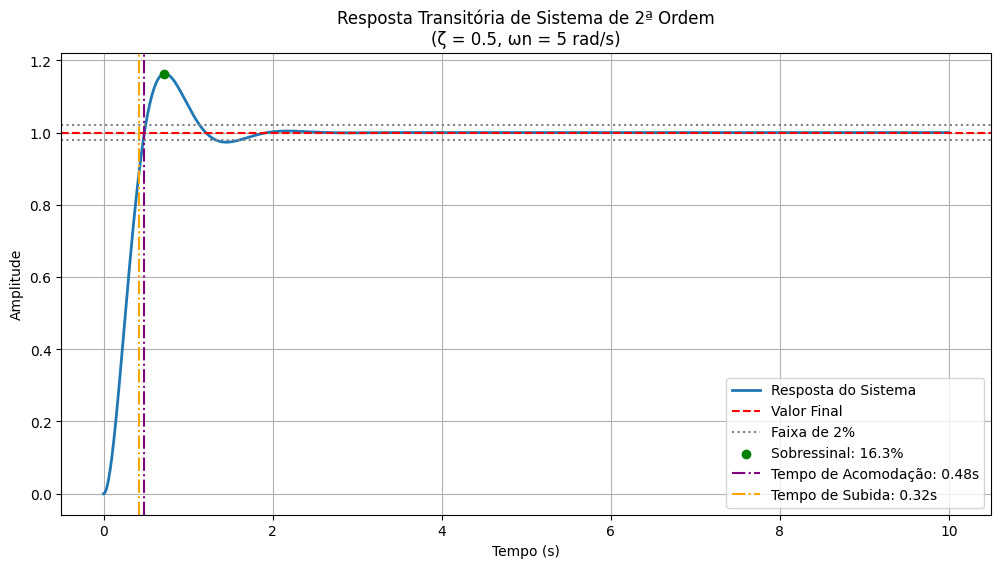

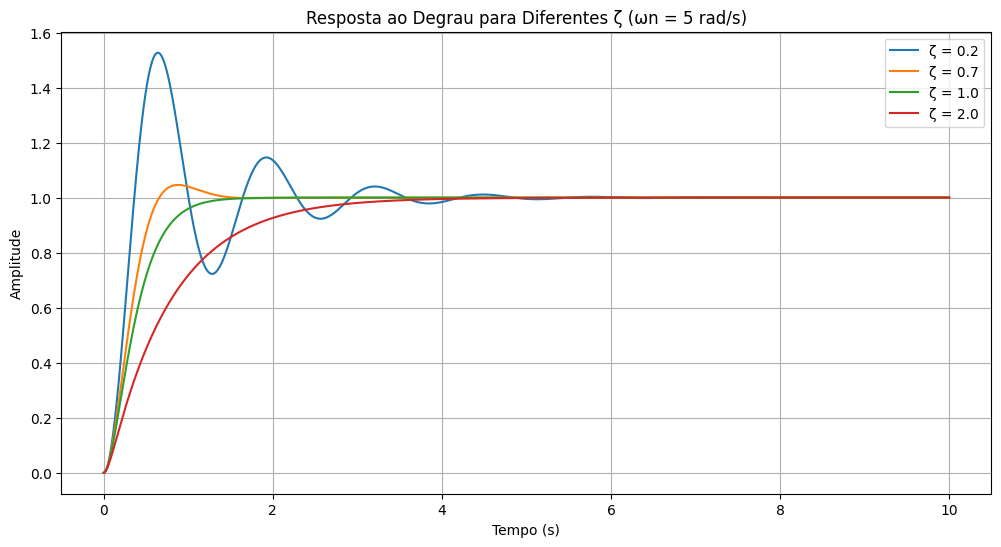


Valores Teóricos:
Sobressinal: 16.30%
Tempo de Pico: 0.726 s
Tempo de Acomodação: 1.600 s


In [4]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

zeta = 0.5
wn = 5    

num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
sys = ct.TransferFunction(num, den)

t = np.linspace(0, 10, 1000)
t, y = ct.step_response(sys, T=t)

y_ss = y[-1]
y_max = np.max(y)
PO = ((y_max - y_ss)/y_ss)*100 if y_ss != 0 else 0

settling_index = np.where(np.abs(y - y_ss) <= 0.02*y_ss)[0][0]
Ts = t[settling_index]

peak_index = np.argmax(y)
Tp = t[peak_index]

rise_lower = 0.1*y_ss
rise_upper = 0.9*y_ss
rise_indices = np.where((y >= rise_lower) & (y <= rise_upper))[0]
Tr = t[rise_indices[-1]] - t[rise_indices[0]]

plt.figure(figsize=(12, 6))
plt.plot(t, y, linewidth=2, label='Resposta do Sistema')
plt.title(f'Resposta Transitória de Sistema de 2ª Ordem\n(ζ = {zeta}, ωn = {wn} rad/s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.axhline(y_ss, color='r', linestyle='--', label='Valor Final')
plt.axhline(y_ss*1.02, color='gray', linestyle=':')
plt.axhline(y_ss*0.98, color='gray', linestyle=':', label='Faixa de 2%')

plt.scatter(Tp, y_max, color='green', zorder=5, 
           label=f'Sobressinal: {PO:.1f}%')
plt.axvline(Ts, color='purple', linestyle='-.', 
           label=f'Tempo de Acomodação: {Ts:.2f}s')
plt.axvline(Tr + t[rise_indices[0]], color='orange', linestyle='-.', 
           label=f'Tempo de Subida: {Tr:.2f}s')

plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
zeta_values = [0.2, 0.7, 1.0, 2.0]

for z in zeta_values:
    den_z = [1, 2*z*wn, wn**2]
    sys_z = ct.TransferFunction(num, den_z)
    t, y = ct.step_response(sys_z, T=t)
    plt.plot(t, y, label=f'ζ = {z}')

plt.title('Resposta ao Degrau para Diferentes ζ (ωn = 5 rad/s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

print("\nValores Teóricos:")
print(f"Sobressinal: {100*np.exp(-zeta*np.pi/np.sqrt(1-zeta**2)):.2f}%")
print(f"Tempo de Pico: {np.pi/(wn*np.sqrt(1-zeta**2)):.3f} s")
print(f"Tempo de Acomodação: {4/(zeta*wn):.3f} s")

### Resposta de um sistema de segunda ordem para uma entrada de impulso.

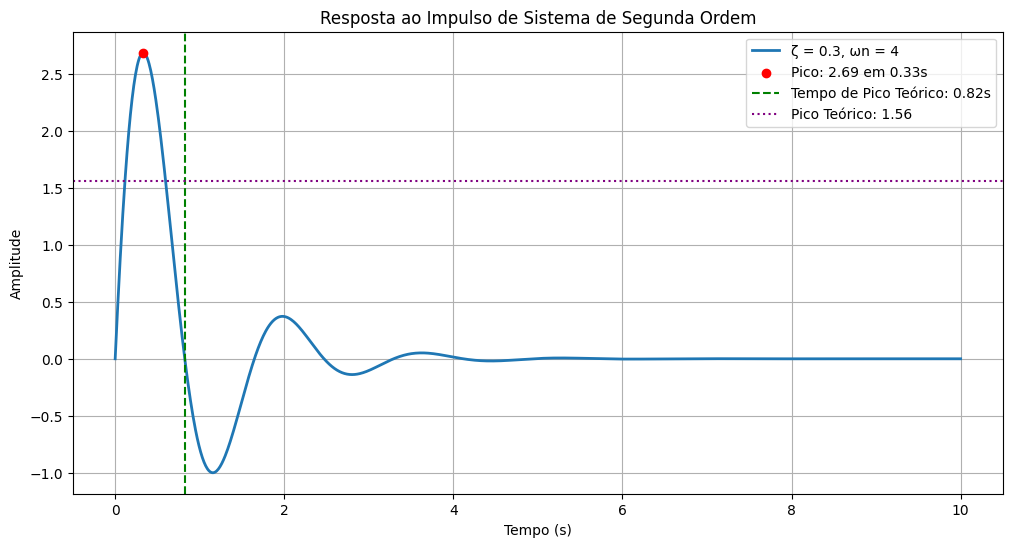

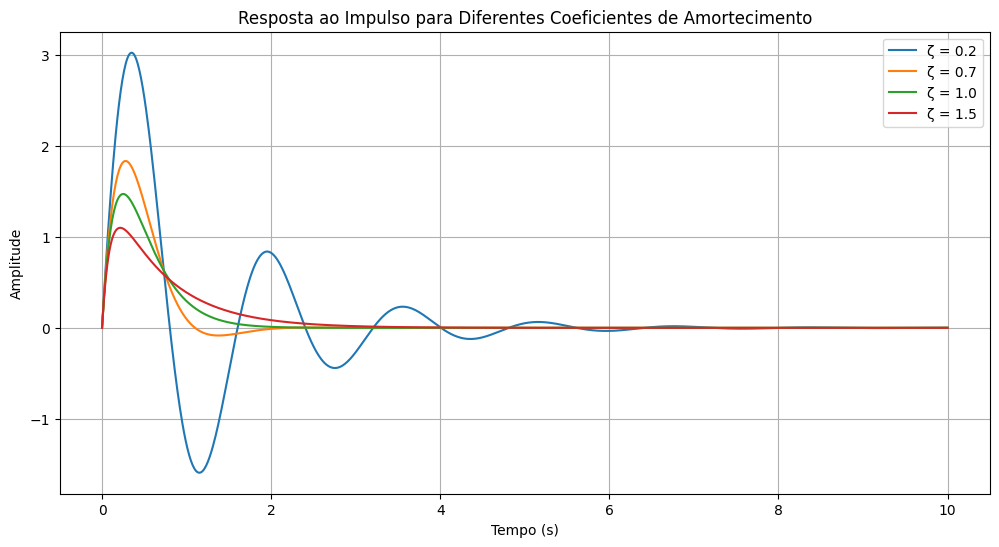


Parâmetros Teóricos:
1. Amplitude do Pico: 2.868
2. Tempo do Primeiro Pico: 0.823 s
3. Tempo de Acomodação (2%): 3.333 s


In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

zeta = 0.3
wn = 4    

sys = ct.TransferFunction([wn**2], [1, 2*zeta*wn, wn**2])

t = np.linspace(0, 10, 1000)
t, y = ct.impulse_response(sys, T=t)

peak_value = np.max(y) if zeta < 1 else y[0]
peak_time = t[np.argmax(y)] if zeta < 1 else 0

plt.figure(figsize=(12, 6))
plt.plot(t, y, linewidth=2, label=f'ζ = {zeta}, ωn = {wn}')
plt.title('Resposta ao Impulso de Sistema de Segunda Ordem')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

if zeta < 1:
    plt.scatter(peak_time, peak_value, color='red', zorder=5,
               label=f'Pico: {peak_value:.2f} em {peak_time:.2f}s')
    
    theoretical_peak = (wn/np.sqrt(1-zeta**2)) * np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))
    theoretical_peak_time = np.pi/(wn*np.sqrt(1-zeta**2))
    
    plt.axvline(theoretical_peak_time, color='green', linestyle='--', 
               label=f'Tempo de Pico Teórico: {theoretical_peak_time:.2f}s')
    plt.axhline(theoretical_peak, color='purple', linestyle=':', 
               label=f'Pico Teórico: {theoretical_peak:.2f}')

plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
zeta_values = [0.2, 0.7, 1.0, 1.5]

for z in zeta_values:
    sys_z = ct.TransferFunction([wn**2], [1, 2*z*wn, wn**2])
    t, y = ct.impulse_response(sys_z, T=t)
    plt.plot(t, y, label=f'ζ = {z}')

plt.title('Resposta ao Impulso para Diferentes Coeficientes de Amortecimento')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Fórmulas teóricas
if zeta < 1:
    print("\nParâmetros Teóricos:")
    print(f"1. Amplitude do Pico: {(wn/np.sqrt(1-zeta**2)) * np.exp(-zeta*np.arctan(np.sqrt(1-zeta**2)/zeta)):.3f}")
    print(f"2. Tempo do Primeiro Pico: {np.pi/(wn*np.sqrt(1-zeta**2)):.3f} s")
    print(f"3. Tempo de Acomodação (2%): {4/(zeta*wn):.3f} s")
else:
    print("Sistema criticamente amortecido ou sobreamortecido - Sem overshoot")

### Resposta ao degrau de um sistema de segunda ordem.

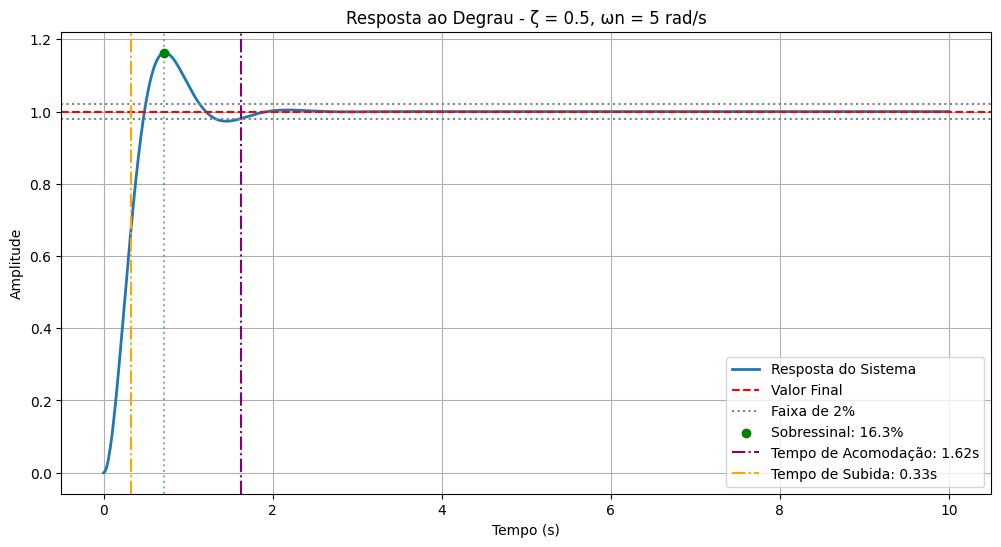

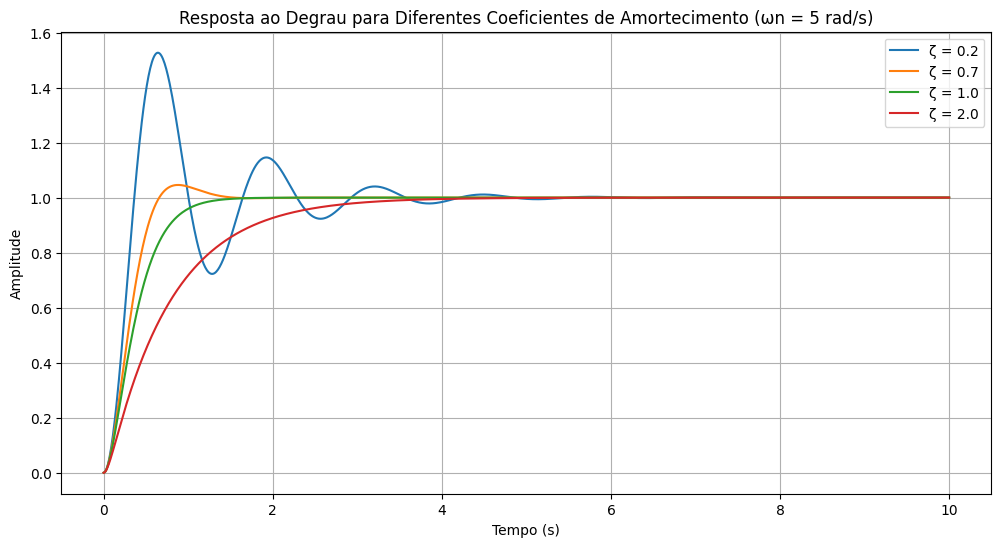


Parâmetros Teóricos:
a) Sobressinal: 16.30%
b) Tempo de Pico: 0.726 s
c) Tempo de Acomodação (2%): 1.600 s
d) Tempo de Subida (Aproximado): 0.336 s

Métricas da Simulação:
RiseTime: 0.330
SettlingTime: 1.622
PeakTime: 0.721
Overshoot: 16.299
SteadyStateValue: 1.000


In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

zeta = 0.5 
wn = 5       

sys = ct.TransferFunction([wn**2], [1, 2*zeta*wn, wn**2])

t = np.linspace(0, 10, 1000)
t, y = ct.step_response(sys, T=t)

info = ct.step_info(sys, T=t)
metrics = {
    'RiseTime': info['RiseTime'],
    'SettlingTime': info['SettlingTime'],
    'PeakTime': info['PeakTime'],
    'Overshoot': info['Overshoot'],
    'SteadyStateValue': y[-1]
}

plt.figure(figsize=(12, 6))
plt.plot(t, y, linewidth=2, label='Resposta do Sistema')
plt.title(f'Resposta ao Degrau - ζ = {zeta}, ωn = {wn} rad/s')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.axhline(metrics['SteadyStateValue'], color='r', linestyle='--', label='Valor Final')
plt.axhline(1.02*metrics['SteadyStateValue'], color='gray', linestyle=':')
plt.axhline(0.98*metrics['SteadyStateValue'], color='gray', linestyle=':', label='Faixa de 2%')

    plt.scatter(metrics['PeakTime'], np.max(y), color='green', zorder=5,
               label=f'Sobressinal: {metrics["Overshoot"]:.1f}%')
    plt.axvline(metrics['PeakTime'], color='green', linestyle=':', alpha=0.5)
    
plt.axvline(metrics['SettlingTime'], color='purple', linestyle='-.', 
           label=f'Tempo de Acomodação: {metrics["SettlingTime"]:.2f}s')
plt.axvline(metrics['RiseTime'], color='orange', linestyle='-.', 
           label=f'Tempo de Subida: {metrics["RiseTime"]:.2f}s')

plt.legend()
plt.show()

zeta_values = [0.2, 0.7, 1.0, 2.0]
plt.figure(figsize=(12, 6))

for z in zeta_values:
    sys_z = ct.TransferFunction([wn**2], [1, 2*z*wn, wn**2])
    t, y_z = ct.step_response(sys_z, T=t)
    plt.plot(t, y_z, label=f'ζ = {z}')

plt.title('Resposta ao Degrau para Diferentes Coeficientes de Amortecimento (ωn = 5 rad/s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

print("\nParâmetros Teóricos:")
if zeta < 1:
    print(f"a) Sobressinal: {100*np.exp(-zeta*np.pi/np.sqrt(1-zeta**2)):.2f}%")
    print(f"b) Tempo de Pico: {np.pi/(wn*np.sqrt(1-zeta**2)):.3f} s")
print(f"c) Tempo de Acomodação (2%): {4/(zeta*wn):.3f} s")
print(f"d) Tempo de Subida (Aproximado): {(2.16*zeta + 0.60)/wn:.3f} s")

print("\nMétricas da Simulação:")
for key, value in metrics.items():
    print(f"{key}: {value:.3f}")

### Porcentagem de ultrapassagem e tempo de pico normalizado versus taxa de amortecimento z para um sistema de segunda ordem


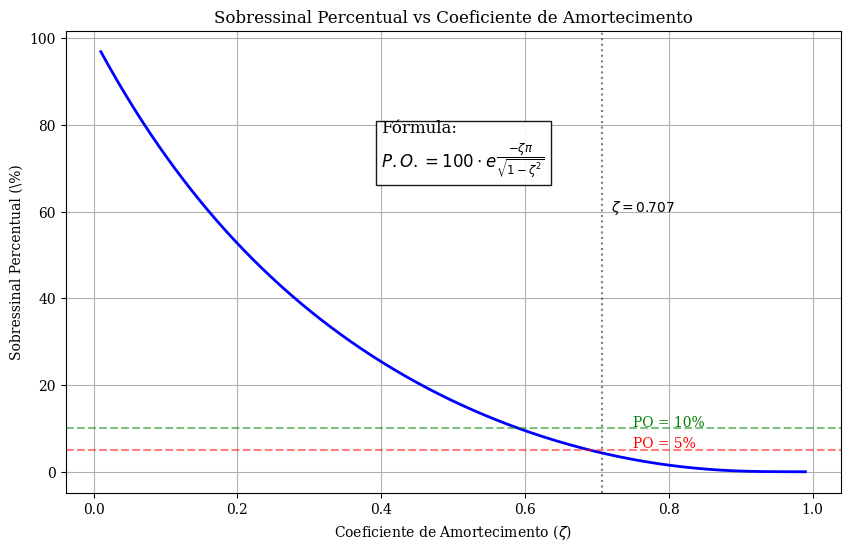

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": False,  
    "font.family": "serif"
})

zeta = np.linspace(0.01, 0.99, 500)

PO = 100 * np.exp(-zeta * np.pi / np.sqrt(1 - zeta**2))

plt.figure(figsize=(10, 6))

plt.plot(zeta, PO, 'b', linewidth=2)
plt.title('Sobressinal Percentual vs Coeficiente de Amortecimento')
plt.xlabel(r'Coeficiente de Amortecimento ($\zeta$)')
plt.ylabel('Sobressinal Percentual (\%)')
plt.grid(True)

plt.axhline(5, color='r', linestyle='--', alpha=0.5)
plt.axhline(10, color='g', linestyle='--', alpha=0.5)
plt.axvline(0.707, color='k', linestyle=':', alpha=0.5)

# Anotações
plt.annotate('PO = 5%', (0.75, 5.5), color='r')
plt.annotate('PO = 10%', (0.75, 10.5), color='g')
plt.annotate(r'$\zeta = 0.707$', (0.72, 60), color='k')

plt.text(0.4, 70, 
         'Fórmula:\n' + 
         r'$P.O. = 100 \cdot e^{\dfrac{-\zeta\pi}{\sqrt{1-\zeta^2}}}$',
         fontsize=12, bbox=dict(facecolor='white', alpha=0.9))

plt.show()

### Tempo de subida normalizado, Tr1, versus z para um sistema de segunda ordem.


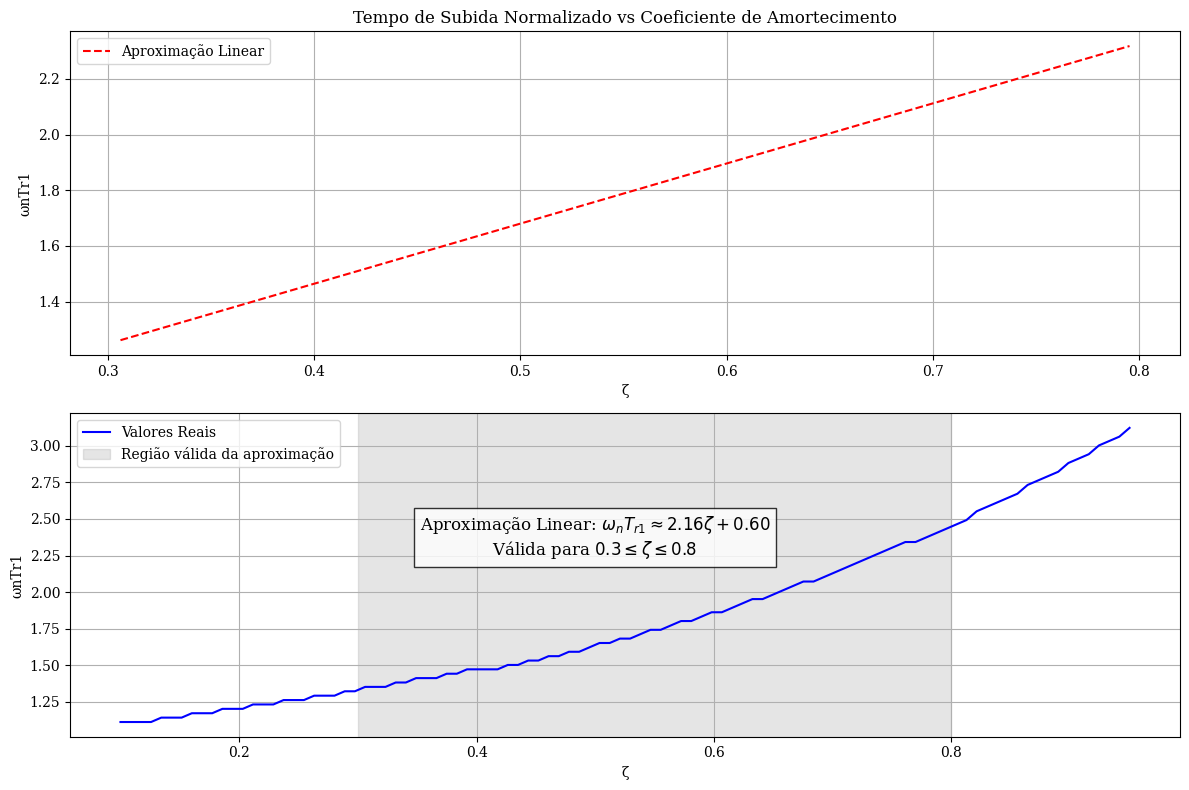

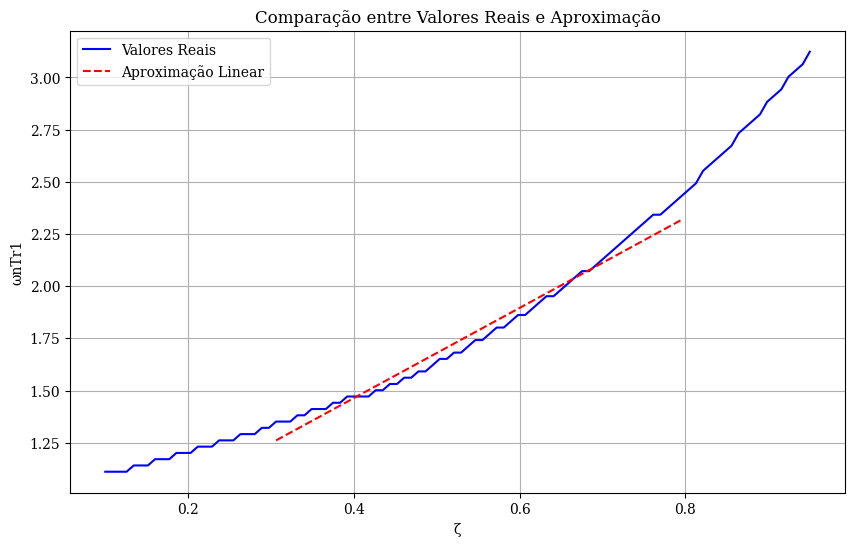

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

def normalized_rise_time(zeta_values, wn=1):
    Tr1_wn = []
    
    for zeta in zeta_values:
        sys = ct.TransferFunction([wn**2], [1, 2*zeta*wn, wn**2])
        
        t = np.linspace(0, 30, 1000)
        t, y = ct.step_response(sys, T=t)
        
        info = ct.step_info(sys, T=t)
        if info['RiseTime'] is not None:
            Tr1_wn.append(info['RiseTime'] * wn) 
        else:
            Tr1_wn.append(None)
    
    return Tr1_wn

zeta_values = np.linspace(0.1, 0.95, 100)  
wn = 1  

Tr1_actual = normalized_rise_time(zeta_values, wn)

valid_mask = (zeta_values >= 0.3) & (zeta_values <= 0.8)
Tr1_approx = 2.16 * zeta_values + 0.60

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(zeta_values[valid_mask], Tr1_approx[valid_mask], 'r--', label='Aproximação Linear')
plt.title('Tempo de Subida Normalizado vs Coeficiente de Amortecimento')
plt.xlabel('ζ')
plt.ylabel('ωnTr1')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(zeta_values, Tr1_actual, 'b-', label='Valores Reais')
plt.xlabel('ζ')
plt.ylabel('ωnTr1')
plt.grid(True)
plt.axvspan(0.3, 0.8, color='gray', alpha=0.2, label='Região válida da aproximação')
plt.legend()

plt.figtext(0.5, 0.3, 
            r'Aproximação Linear: $\omega_n T_{r1} \approx 2.16\zeta + 0.60$' + '\n' +
            r'Válida para $0.3 \leq \zeta \leq 0.8$',
            ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(zeta_values, Tr1_actual, 'b-', label='Valores Reais')
plt.plot(zeta_values[valid_mask], Tr1_approx[valid_mask], 'r--', label='Aproximação Linear')
plt.title('Comparação entre Valores Reais e Aproximação')
plt.xlabel('ζ')
plt.ylabel('ωnTr1')
plt.grid(True)
plt.legend()
plt.show()

### Resposta ao degrau para z = 0,2 para vn = 1 e vn = 10. E a resposta ao degrau para vn = 5 com z = 0,7 e z = 1.

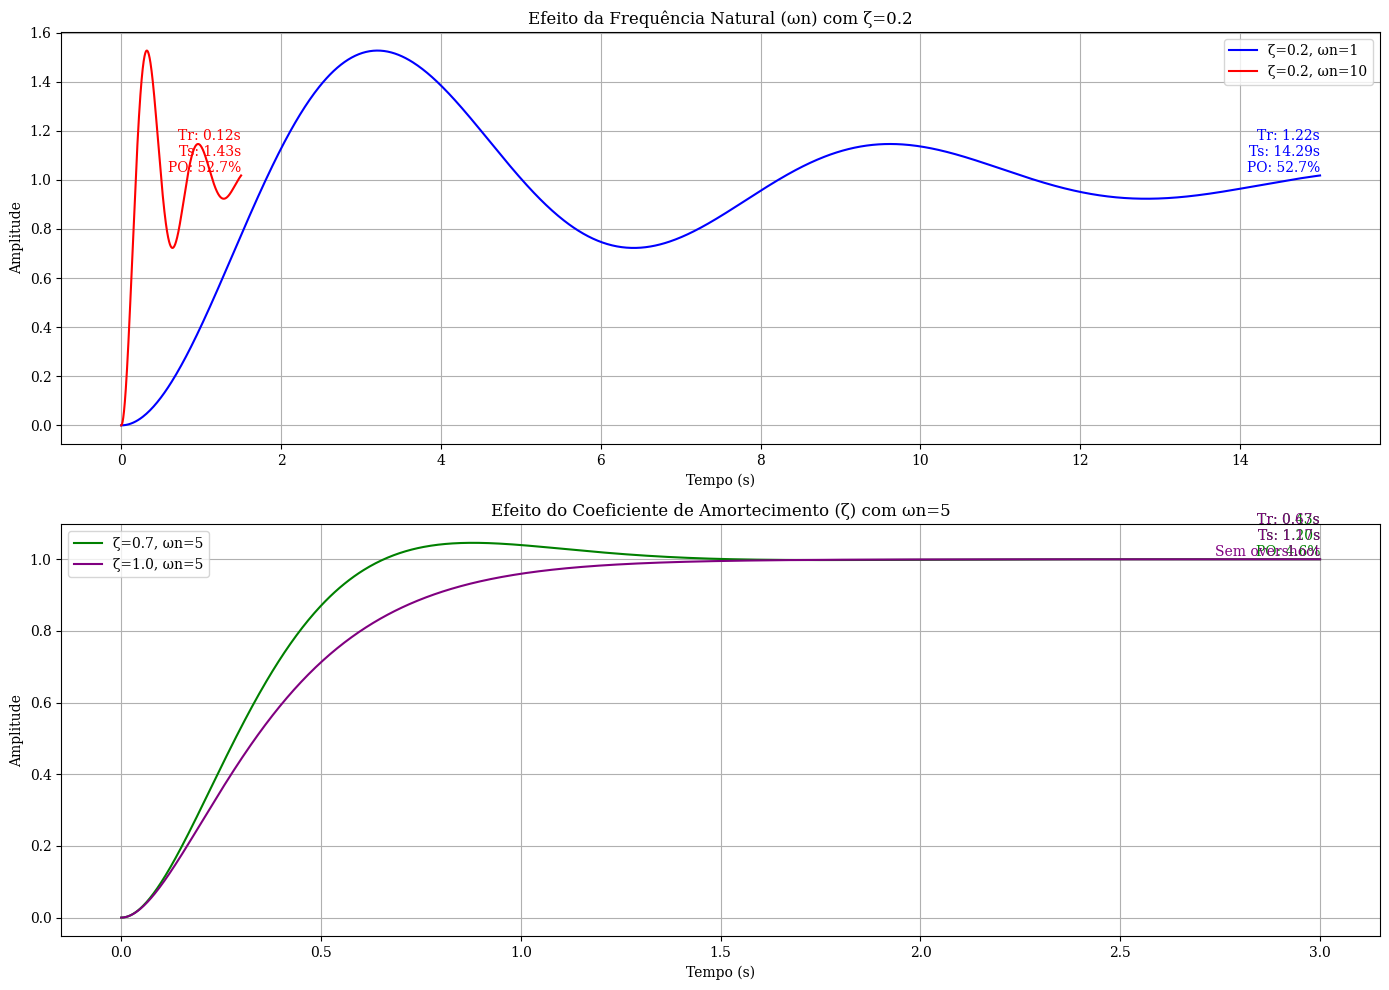

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

systems = [
    {'zeta': 0.2, 'wn': 1, 'color': 'blue', 'label': 'ζ=0.2, ωn=1'},
    {'zeta': 0.2, 'wn': 10, 'color': 'red', 'label': 'ζ=0.2, ωn=10'},
    {'zeta': 0.7, 'wn': 5, 'color': 'green', 'label': 'ζ=0.7, ωn=5'},
    {'zeta': 1.0, 'wn': 5, 'color': 'purple', 'label': 'ζ=1.0, ωn=5'}
]

plt.figure(figsize=(14, 10))

ax1 = plt.subplot(2, 1, 1)
for sys in systems[:2]:
    tf = ct.TransferFunction([sys['wn']**2], [1, 2*sys['zeta']*sys['wn'], sys['wn']**2])
    t = np.linspace(0, 15/sys['wn'], 1000)
    t, y = ct.step_response(tf, T=t)
    
    info = ct.step_info(tf, T=t)
    line = ax1.plot(t, y, color=sys['color'], label=sys['label'])
    
    # Anotações
    text = (f"Tr: {info['RiseTime']:.2f}s\n"
            f"Ts: {info['SettlingTime']:.2f}s\n"
            f"PO: {info['Overshoot']:.1f}%" if info['Overshoot'] else "")
    ax1.text(t[-1], y[-1], text, color=line[0].get_color(), 
            verticalalignment='bottom', horizontalalignment='right')

ax1.set_title('Efeito da Frequência Natural (ωn) com ζ=0.2')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Amplitude')
ax1.grid(True)
ax1.legend()

ax2 = plt.subplot(2, 1, 2)
for sys in systems[2:]:
    tf = ct.TransferFunction([sys['wn']**2], [1, 2*sys['zeta']*sys['wn'], sys['wn']**2])
    t = np.linspace(0, 15/sys['wn'], 1000)
    t, y = ct.step_response(tf, T=t)
    
    info = ct.step_info(tf, T=t)
    line = ax2.plot(t, y, color=sys['color'], label=sys['label'])
    
    text = (f"Tr: {info['RiseTime']:.2f}s\n"
            f"Ts: {info['SettlingTime']:.2f}s\n" +
           (f"PO: {info['Overshoot']:.1f}%" if sys['zeta'] < 1 else "Sem overshoot"))
    ax2.text(t[-1], y[-1], text, color=line[0].get_color(), 
            verticalalignment='bottom', horizontalalignment='right')

ax2.set_title('Efeito do Coeficiente de Amortecimento (ζ) com ωn=5')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Amplitude')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## 5.4

### Comparação de dois sistemas de terceira ordem com um sistema de segunda ordem (linha tracejada) ilustrando o conceito de polos dominantes

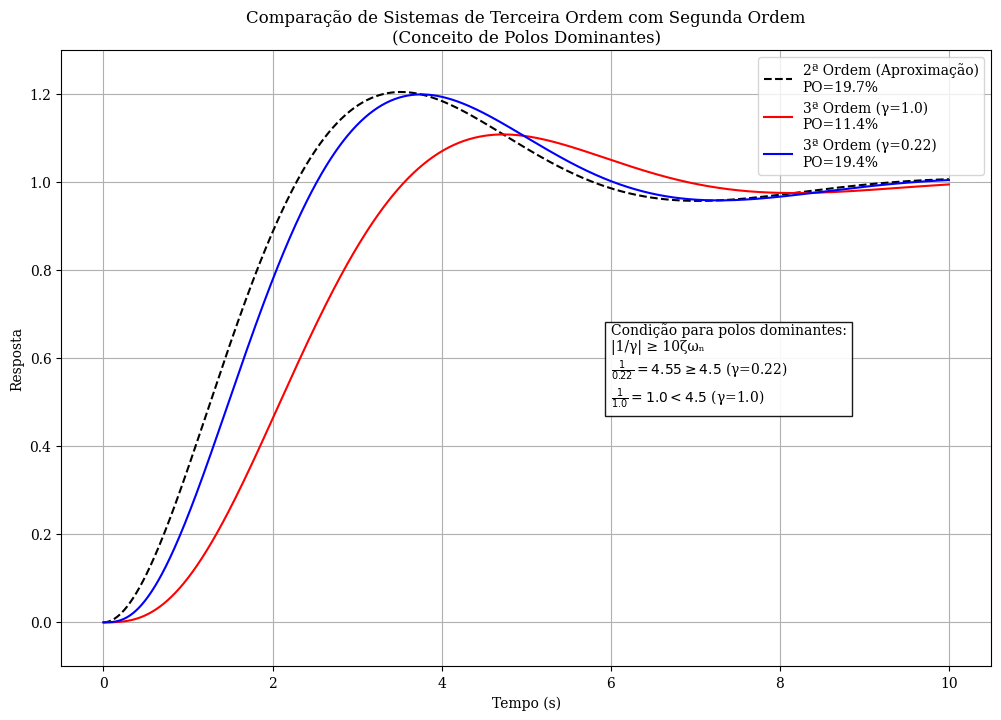

In [25]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

zeta = 0.45
wn = 1.0

gamma_cases = [
    {'gamma': 1.0, 'label': '3ª Ordem (γ=1.0)', 'color': 'red'},
    {'gamma': 0.22, 'label': '3ª Ordem (γ=0.22)', 'color': 'blue'}
]

systems = []

sys_2nd = ct.TransferFunction([1], [1, 2*zeta*wn, wn**2])
systems.append({'sys': sys_2nd, 'label': '2ª Ordem (Aproximação)', 'color': 'black', 'linestyle': '--'})

for case in gamma_cases:
    gamma = case['gamma']
    
    quad_poly = [1, 2*zeta*wn, wn**2]
    linear_poly = [gamma, 1]
    den = np.convolve(quad_poly, linear_poly)
    
    sys = ct.TransferFunction([1], den)
    systems.append({**case, 'sys': sys, 'linestyle': '-'})

t = np.linspace(0, 10, 1000)
plt.figure(figsize=(12, 8))

for system in systems:
    t, y = ct.step_response(system['sys'], T=t)
    
    y_ss = y[-1]
    y_max = np.max(y)
    PO = 100*(y_max - y_ss)/y_ss if y_ss != 0 else 0
    
    plt.plot(t, y, 
             color=system.get('color', 'black'),
             linestyle=system.get('linestyle', '-'),
             label=f"{system['label']}\nPO={PO:.1f}%")

plt.title('Comparação de Sistemas de Terceira Ordem com Segunda Ordem\n(Conceito de Polos Dominantes)')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.3)

plt.text(6, 0.5, 
         'Condição para polos dominantes:\n|1/γ| ≥ 10ζωₙ\n' +
         r'$\frac{1}{0.22} = 4.55 \geq 4.5$ (γ=0.22)' + '\n' +
         r'$\frac{1}{1.0} = 1.0 < 4.5$ (γ=1.0)',
         bbox=dict(facecolor='white', alpha=0.9))

plt.show()

### A resposta para a função de transferência de segunda ordem

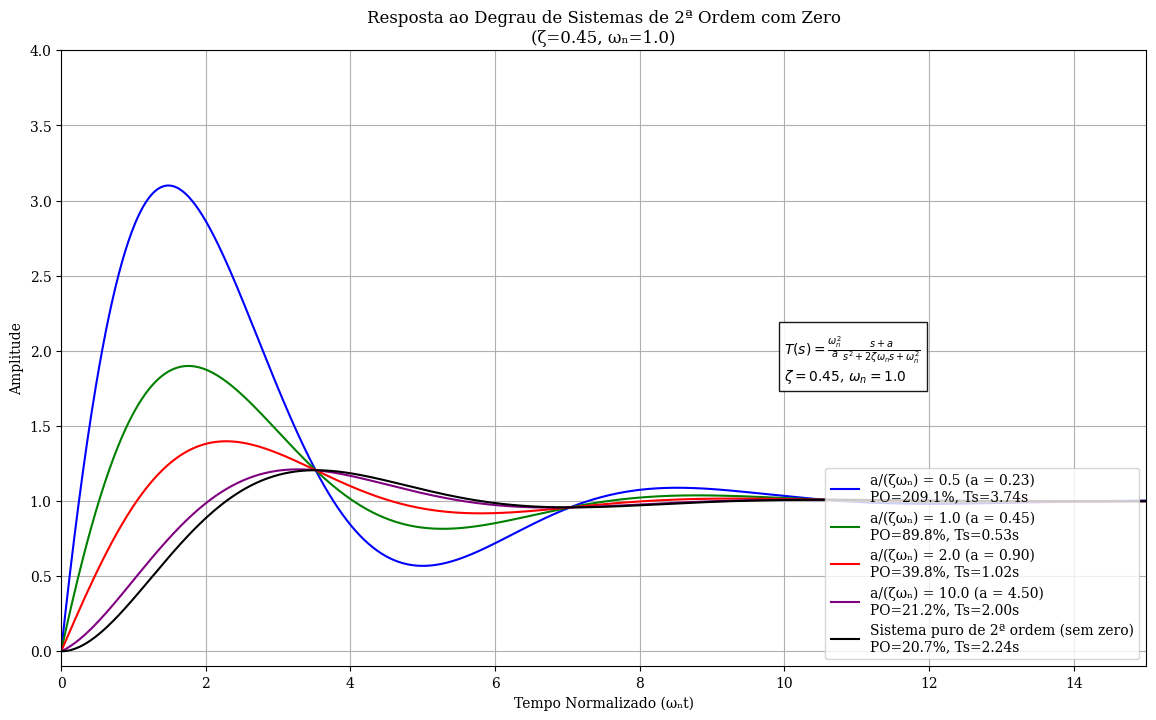

In [30]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

zeta = 0.45
wn = 1.0  
ratios = [0.5, 1, 2, 10.0]  

systems = []
for ratio in ratios:
    a = ratio * zeta * wn
    
    num = [wn**2/a, wn**2]  
    den = [1, 2*zeta*wn, wn**2]
    
    systems.append({
        'sys': ct.TransferFunction(num, den),
        'label': f'a/(ζωₙ) = {ratio:.1f} (a = {a:.2f})'
    })

sys_pure = ct.TransferFunction([wn**2], [1, 2*zeta*wn, wn**2])
systems.append({
    'sys': sys_pure,
    'label': 'Sistema puro de 2ª ordem (sem zero)'
})

plt.figure(figsize=(14, 8))
colors = ['blue', 'green', 'red', 'purple', 'black']
t = np.linspace(0, 15, 1000)

for i, system in enumerate(systems):
    t, y = ct.step_response(system['sys'], T=t)
    
    y_ss = y[-1]
    y_max = np.max(y)
    PO = 100 * (y_max - y_ss)/y_ss if y_ss != 0 else 0
    
    settling_index = np.where(np.abs(y - y_ss) <= 0.02*y_ss)[0][0]
    Ts = t[settling_index]
    
    plt.plot(t, y, color=colors[i], 
             label=f"{system['label']}\nPO={PO:.1f}%, Ts={Ts:.2f}s")

plt.title('Resposta ao Degrau de Sistemas de 2ª Ordem com Zero\n(ζ=0.45, ωₙ=1.0)')
plt.xlabel('Tempo Normalizado (ωₙt)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend(loc='lower right')
plt.ylim(-0.1, 4.0)
plt.xlim(0, 15)

plt.text(10, 1.8, 
         r'$T(s) = \frac{\omega_n^2}{a}\frac{s + a}{s^2 + 2\zeta\omega_n s + \omega_n^2}$' + '\n' +
         r'$\zeta = 0.45$, $\omega_n = 1.0$',
         bbox=dict(facecolor='white', alpha=0.9))

plt.show()

## 5.7

### Os índices de desempenho do sistema de controle do telescópio em comparação ao K3.

C:\Users\ismae\AppData\Local\Temp\ipykernel_6960\2595541734.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ISE = np.trapz(e**2, t)
C:\Users\ismae\AppData\Local\Temp\ipykernel_6960\2595541734.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  IAE = np.trapz(np.abs(e), t)


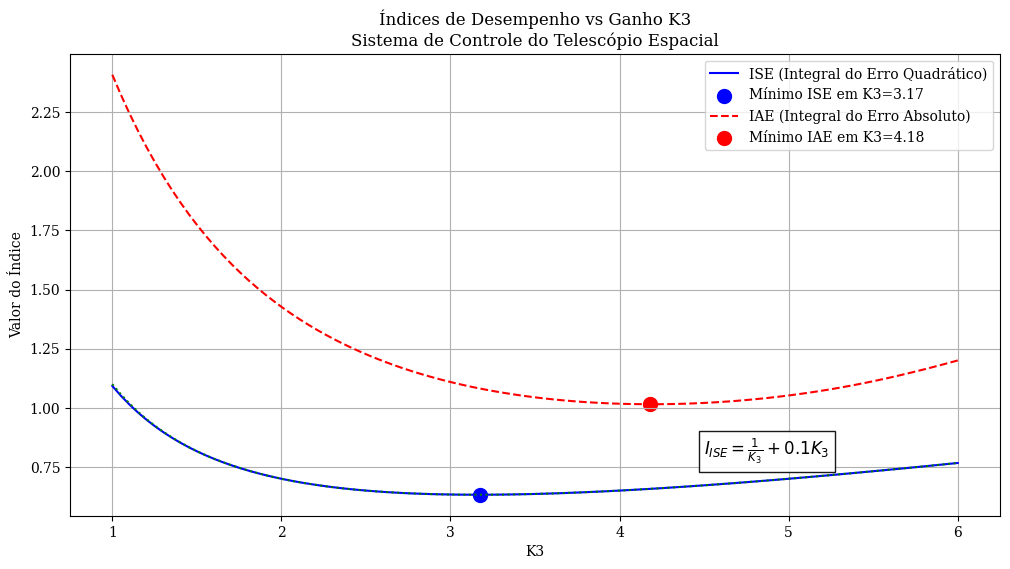

Valor ótimo de K3 para ISE: 3.17 (ζ = 1.003)
Valor ótimo de K3 para IAE: 4.18 (ζ = 1.322)


In [19]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

K1 = 0.5
K1K2Kp = 2.5

def calculate_indices(K3_values, T=10, n_points=1000):
    ISE_values = []
    IAE_values = []
    
    for K3 in K3_values:
        num = [1, K1*K3, 0]
        den = [1, K1*K3, K1K2Kp]
        sys = ct.TransferFunction(num, den)
        
        t = np.linspace(0, T, n_points)
        t, y = ct.step_response(sys, T=t)
        
        e = y 
        dt = t[1] - t[0]
        
        ISE = np.trapz(e**2, t)
        IAE = np.trapz(np.abs(e), t)
        
        ISE_values.append(ISE)
        IAE_values.append(IAE)
    
    return ISE_values, IAE_values

K3_values = np.linspace(1, 6, 100)
ISE, IAE = calculate_indices(K3_values)

optimal_ISE = K3_values[np.argmin(ISE)]
optimal_IAE = K3_values[np.argmin(IAE)]

plt.figure(figsize=(12, 6))

plt.plot(K3_values, ISE, 'b-', label='ISE (Integral do Erro Quadrático)')
plt.scatter(optimal_ISE, min(ISE), color='blue', s=100, 
           label=f'Mínimo ISE em K3={optimal_ISE:.2f}')

plt.plot(K3_values, IAE, 'r--', label='IAE (Integral do Erro Absoluto)')
plt.scatter(optimal_IAE, min(IAE), color='red', s=100,
           label=f'Mínimo IAE em K3={optimal_IAE:.2f}')

plt.title('Índices de Desempenho vs Ganho K3\nSistema de Controle do Telescópio Espacial')
plt.xlabel('K3')
plt.ylabel('Valor do Índice')
plt.grid(True)
plt.legend()

plt.annotate(r'$I_{ISE} = \frac{1}{K_3} + 0.1K_3$', 
             xy=(4.5, 0.8), xycoords='data',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.9))

I_analytic = 1/K3_values + 0.1*K3_values
plt.plot(K3_values, I_analytic, 'g:', label='Solução Analítica para ISE')

plt.show()

print(f"Valor ótimo de K3 para ISE: {optimal_ISE:.2f} (ζ = {0.5*optimal_ISE/np.sqrt(2.5):.3f})")
print(f"Valor ótimo de K3 para IAE: {optimal_IAE:.2f} (ζ = {0.5*optimal_IAE/np.sqrt(2.5):.3f})")

### Respostas de degrau de uma função de transferência normalizada usando coeficientes ótimos para (a) ISE, (b) IAE e (c) ITAE. A resposta é para tempo normalizado, vnt.


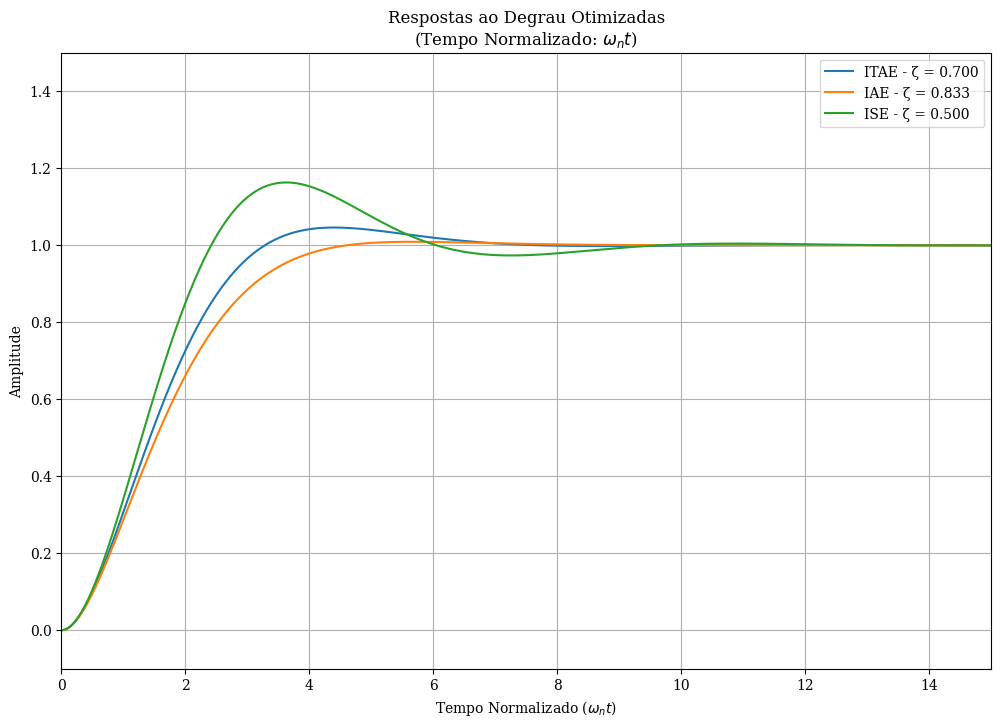

In [23]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

optimal_coefficients = {
    'ITAE': [1.4, 1.0],  
    'IAE': [1.665, 1.0],
    'ISE': [1.0, 1.0] 
}

systems = []
for criterion, den_coeffs in optimal_coefficients.items():
    den = [1, den_coeffs[0], den_coeffs[1]]
    sys = ct.TransferFunction([1], den)
    systems.append((criterion, sys))

plt.figure(figsize=(12, 8))
for criterion, sys in systems:
    t, y = ct.step_response(sys, T=np.linspace(0, 15, 1000))
    
    den_poly = sys.den[0][0] 
    a = den_poly[1] 
    b = den_poly[2] 
    
    ζ = a / (2 * np.sqrt(b))
    
    plt.plot(t, y, label=f'{criterion} - ζ = {ζ:.3f}')

plt.title('Respostas ao Degrau Otimizadas\n(Tempo Normalizado: $\\omega_n t$)')
plt.xlabel('Tempo Normalizado ($\\omega_n t$)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.5)
plt.xlim(0, 15)
plt.show()

## 5.9

### O sistema de apontamento do telescópio Hubble, resposta do sistema a um comando de entrada de degrau unitário e a uma entrada de perturbação de degrau unitário.

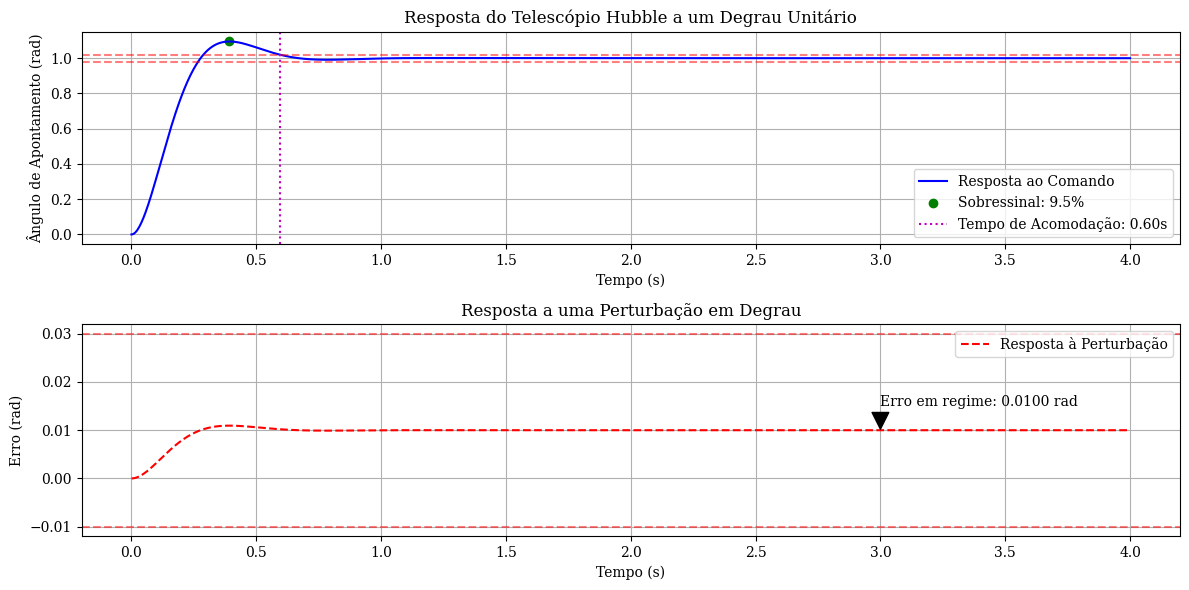

Métricas para Comando de Degrau:
1. Sobressinal: 9.48%
2. Tempo de Subida (10-90%): 0.18s
3. Tempo de Acomodação (2%): 0.60s

Métricas para Perturbação:
1. Valor Final do Erro: 0.0100 rad
2. Máximo Erro: 0.0109 rad


In [33]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

K = 100
K1 = 12

num = [K]
den = [1, K1, K]
sys = ct.TransferFunction(num, den)

t = np.linspace(0, 4, 1000)

t_step, y_step = ct.step_response(sys, T=t)

sys_disturbance = ct.TransferFunction([1], den) 
t_dist, y_dist = ct.step_response(sys_disturbance, T=t)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_step, y_step, 'b-', label='Resposta ao Comando')
plt.title('Resposta do Telescópio Hubble a um Degrau Unitário')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de Apontamento (rad)')
plt.grid(True)

info_step = ct.step_info(sys, T=t)
plt.axhline(1.02, color='r', linestyle='--', alpha=0.5)
plt.axhline(0.98, color='r', linestyle='--', alpha=0.5)
plt.scatter(info_step['PeakTime'], info_step['Peak'], color='g', 
           label=f'Sobressinal: {info_step["Overshoot"]:.1f}%')
plt.axvline(info_step['SettlingTime'], color='m', linestyle=':', 
           label=f'Tempo de Acomodação: {info_step["SettlingTime"]:.2f}s')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_dist, y_dist, 'r--', label='Resposta à Perturbação')
plt.title('Resposta a uma Perturbação em Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro (rad)')
plt.grid(True)

y_ss_dist = y_dist[-1]
plt.axhline(y_ss_dist + 0.02, color='r', linestyle='--', alpha=0.5)
plt.axhline(y_ss_dist - 0.02, color='r', linestyle='--', alpha=0.5)
plt.annotate(f'Erro em regime: {y_ss_dist:.4f} rad', 
            xy=(3, y_ss_dist), 
            xytext=(3, 0.015),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend()

plt.tight_layout()
plt.show()

print("Métricas para Comando de Degrau:")
print(f"1. Sobressinal: {info_step['Overshoot']:.2f}%")
print(f"2. Tempo de Subida (10-90%): {info_step['RiseTime']:.2f}s")
print(f"3. Tempo de Acomodação (2%): {info_step['SettlingTime']:.2f}s")

print("\nMétricas para Perturbação:")
print(f"1. Valor Final do Erro: {y_ss_dist:.4f} rad")
print(f"2. Máximo Erro: {np.max(y_dist):.4f} rad")

### Comparação de resposta ao degrau do modelo de aeronave de terceira ordem versus aproximação de segunda ordem.

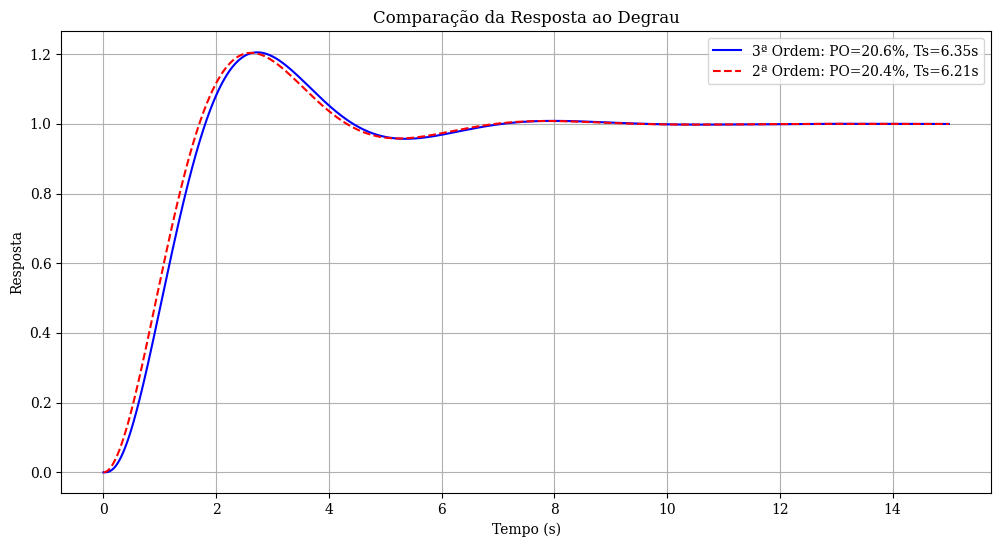

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

K = 0.16

num_3rd = [114*K]
den_3rd = [1, 11.4, 14, 114*K]
sys_3rd = ct.TransferFunction(num_3rd, den_3rd)

wn = np.sqrt(11.29*K)
zeta = np.sqrt(0.043/K - 0.065) if (0.043/K - 0.065) > 0 else 0.45

den_2nd = [1, 2*zeta*wn, wn**2]
sys_2nd = ct.TransferFunction([wn**2], den_2nd)

t = np.linspace(0, 15, 3000)  # Tempo maior para sistemas lentos

def get_step_info(t, y):
    y_ss = y[-1]
    y_max = np.max(y)
    
    info = {
        'Overshoot': 100*(y_max - y_ss)/y_ss if y_ss != 0 else 0,
        'SettlingTime': next((t[i] for i in range(len(y)) if np.all(np.abs(y[i:] - y_ss) <= 0.02*y_ss))), 
        'PeakTime': t[np.argmax(y)]
    }
    return info

_, y_3rd = ct.step_response(sys_3rd, T=t)
_, y_2nd = ct.step_response(sys_2nd, T=t)

info_3rd = get_step_info(t, y_3rd)
info_2nd = get_step_info(t, y_2nd)

plt.figure(figsize=(12,6))
plt.plot(t, y_3rd, 'b-', label=f'3ª Ordem: PO={info_3rd["Overshoot"]:.1f}%, Ts={info_3rd["SettlingTime"]:.2f}s')
plt.plot(t, y_2nd, 'r--', label=f'2ª Ordem: PO={info_2nd["Overshoot"]:.1f}%, Ts={info_2nd["SettlingTime"]:.2f}s')

plt.title('Comparação da Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.grid(True)
plt.legend()
plt.show()

### Resposta ao degrau do modelo de aeronave de terceira ordem com K = 0,10, 0,16, e 0,20 mostrando que, como previsto, conforme K diminui a porcentagem de overshoot diminui enquanto o tempo até o pico aumenta.


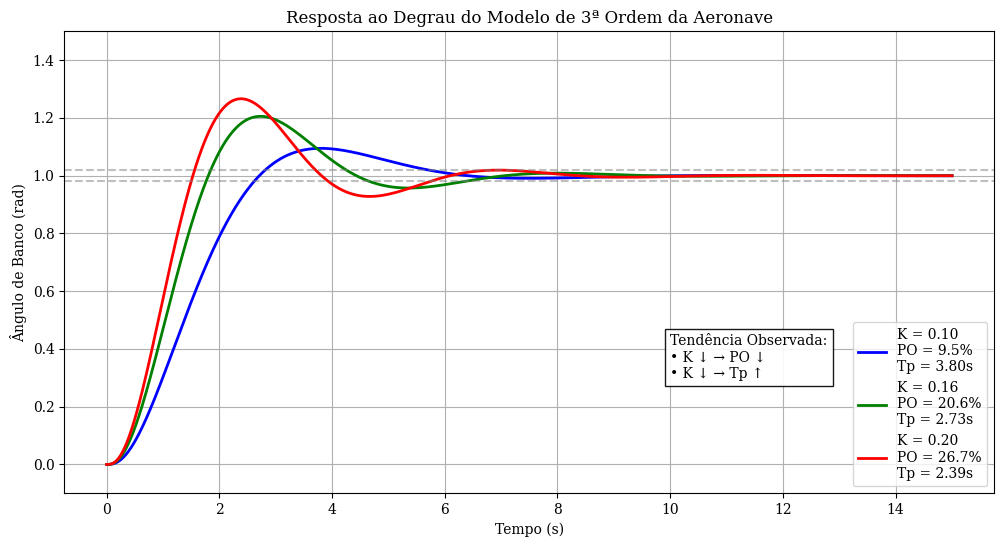

In [39]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

K_values = [0.10, 0.16, 0.20]
colors = ['blue', 'green', 'red']
t = np.linspace(0, 15, 3000)

plt.figure(figsize=(12, 6))

def calculate_metrics(t, y):
    y_ss = y[-1]
    y_max = np.max(y)
    peak_index = np.argmax(y)
    
    return {
        'PO': 100*(y_max - y_ss)/y_ss if y_ss != 0 else 0,
        'Tp': t[peak_index],
        'Ts': next((t[i] for i in range(len(y)) if np.all(np.abs(y[i:] - y_ss) <= 0.02*y_ss)), None)
    }

for K, color in zip(K_values, colors):
    num = [114*K]
    den = [1, 11.4, 14, 114*K]
    sys = ct.TransferFunction(num, den)
    
    _, y = ct.step_response(sys, T=t)
    
    metrics = calculate_metrics(t, y)
    
    label = (f'K = {K:.2f}\n'
             f'PO = {metrics["PO"]:.1f}%\n'
             f'Tp = {metrics["Tp"]:.2f}s')
    
    plt.plot(t, y, color=color, linewidth=2, label=label)

plt.title('Resposta ao Degrau do Modelo de 3ª Ordem da Aeronave')
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de Banco (rad)')
plt.grid(True)
plt.legend(loc='lower right')
plt.ylim(-0.1, 1.5)

plt.axhline(1.02, color='gray', linestyle='--', alpha=0.5)
plt.axhline(0.98, color='gray', linestyle='--', alpha=0.5)

plt.text(10, 0.3, 
         'Tendência Observada:\n'
         '• K ↓ → PO ↓\n' 
         '• K ↓ → Tp ↑',
         bbox=dict(facecolor='white', alpha=0.9))

plt.show()

## 5.10

### Resposta de um sistema de segunda ordem a uma entrada em degrau.

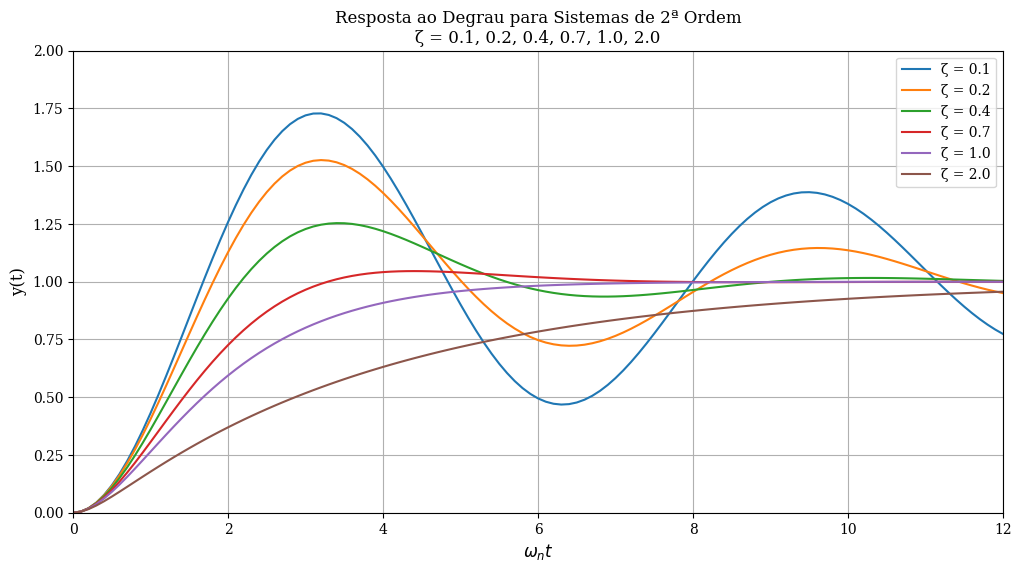

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 12.1, 0.1)

# Valores de zeta
zetas = [0.1, 0.2, 0.4, 0.7, 1.0, 2.0]

responses = []

for zeta in zetas:
    num = [1]
    den = [1, 2*zeta, 1]
    sys = ct.TransferFunction(num, den)
    t_out, y = ct.step_response(sys, T=t)
    responses.append((t_out, y))

plt.figure(figsize=(12, 6))

for i, (t_plot, y) in enumerate(responses):
    plt.plot(t_plot, y, label=f'ζ = {zetas[i]}')

plt.xlabel('$\omega_n t$', fontsize=12)
plt.ylabel('y(t)', fontsize=12)
plt.title('Resposta ao Degrau para Sistemas de 2ª Ordem\nζ = 0.1, 0.2, 0.4, 0.7, 1.0, 2.0')
plt.grid(True)
plt.legend()
plt.xlim(0, 12)
plt.ylim(0, 2.0)

plt.show()

### Resposta de um sistema de segunda ordem a uma entrada de função de impulso

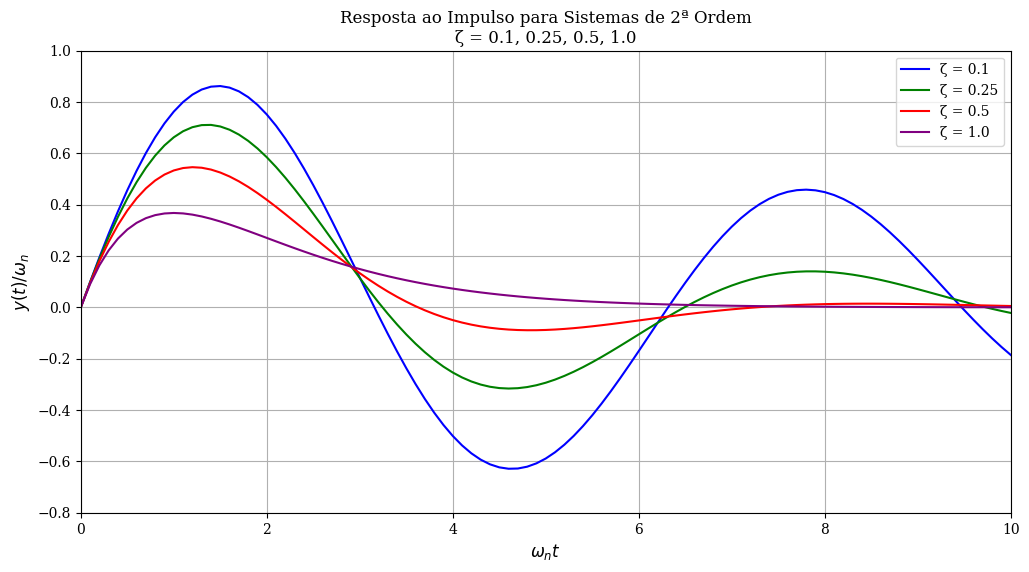

In [43]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 10.1, 0.1)

zetas = [0.1, 0.25, 0.5, 1.0]

responses = []

for zeta in zetas:
    num = [1]
    den = [1, 2*zeta, 1]
    sys = ct.TransferFunction(num, den)
    t_out, y = ct.impulse_response(sys, T=t)
    responses.append((t_out, y))

plt.figure(figsize=(12, 6))

colors = ['blue', 'green', 'red', 'purple']

for i, (t_plot, y) in enumerate(responses):
    plt.plot(t_plot, y, color=colors[i], label=f'ζ = {zetas[i]}')

plt.xlabel(r'$\omega_n t$', fontsize=12)
plt.ylabel(r'$y(t)/\omega_n$', fontsize=12)
plt.title('Resposta ao Impulso para Sistemas de 2ª Ordem\nζ = 0.1, 0.25, 0.5, 1.0')
plt.grid(True)
plt.legend()
plt.xlim(0, 10)
plt.ylim(-0.8, 1.0) 

plt.show()

### Resposta transitória do sistema de controle de direção do robô móvel a uma entrada de rampa.

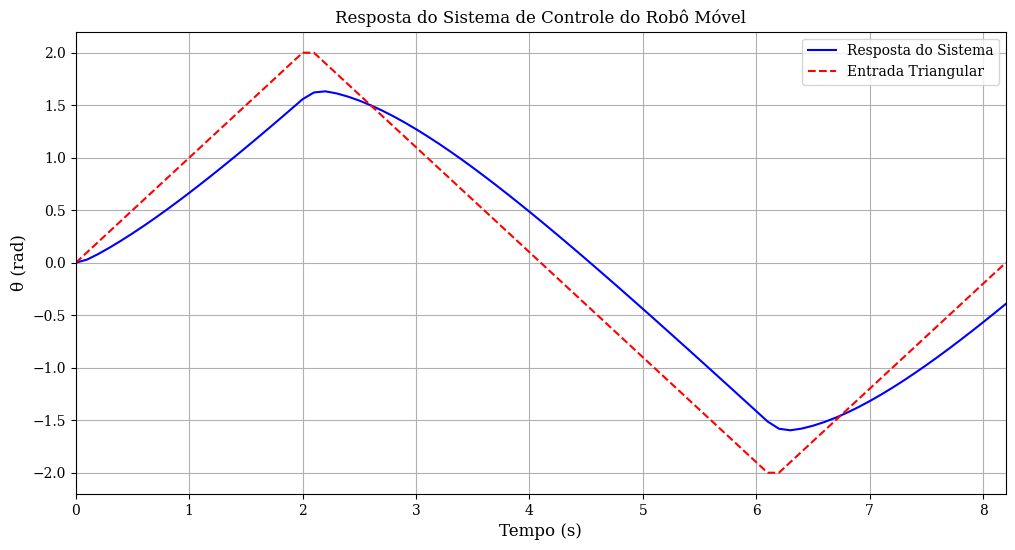

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

numg = [10, 20]
deng = [1, 10, 0]
sysg = ct.TransferFunction(numg, deng)

sys = ct.feedback(sysg, 1)

t = np.arange(0, 8.3, 0.1) 

v1 = np.linspace(0, 2, 21)     
v2 = np.linspace(2, -2, 41)    
v3 = np.linspace(-2, 0, 21)    
u = np.concatenate([v1, v2, v3])

t_sim, y = ct.forced_response(sys, T=t, U=u)

plt.figure(figsize=(12, 6))
plt.plot(t_sim, y, 'b-', label='Resposta do Sistema')
plt.plot(t, u, 'r--', label='Entrada Triangular')
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('θ (rad)', fontsize=12)
plt.title('Resposta do Sistema de Controle do Robô Móvel')
plt.grid(True)
plt.legend()
plt.xlim(0, 8.2)
plt.show()

### Comparação de resposta ao degrau para uma função de transferência aproximada versus a função de transferência real.

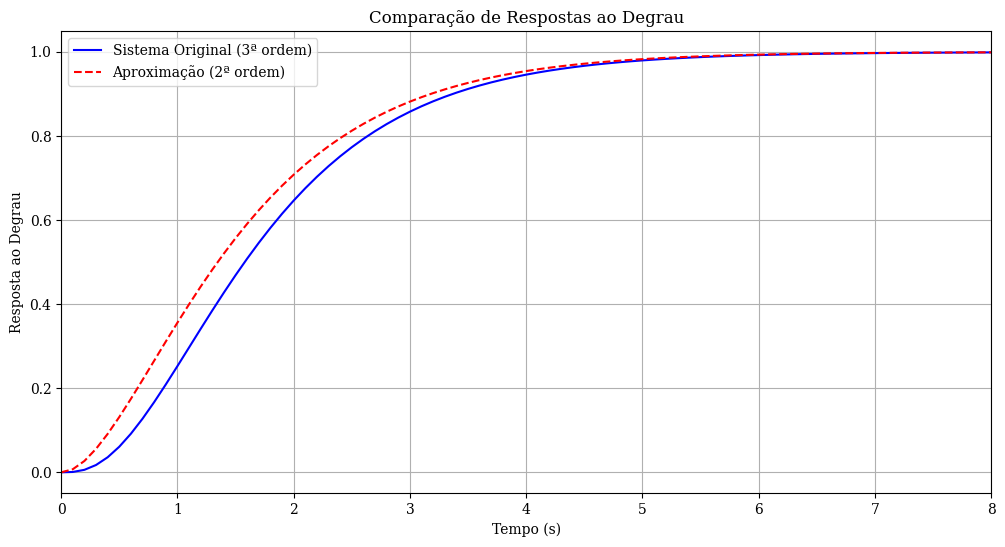

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 8.1, 0.1)

num1 = [6]
den1 = [1, 6, 11, 6]
sys1 = ct.TransferFunction(num1, den1)

num2 = [1.6]
den2 = [1, 2.594, 1.6]
sys2 = ct.TransferFunction(num2, den2)

t1, y1 = ct.step_response(sys1, T=t)
t2, y2 = ct.step_response(sys2, T=t)

plt.figure(figsize=(12, 6))
plt.plot(t1, y1, 'b-', label='Sistema Original (3ª ordem)')
plt.plot(t2, y2, 'r--', label='Aproximação (2ª ordem)')
plt.grid(True)
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao Degrau')
plt.title('Comparação de Respostas ao Degrau')
plt.legend()
plt.xlim(0, 8)
plt.show()

## 5.11

### Resposta do sistema a uma entrada de degrau unitário, r1t2 = 1, t 7 0, Ka = 30 e 60.

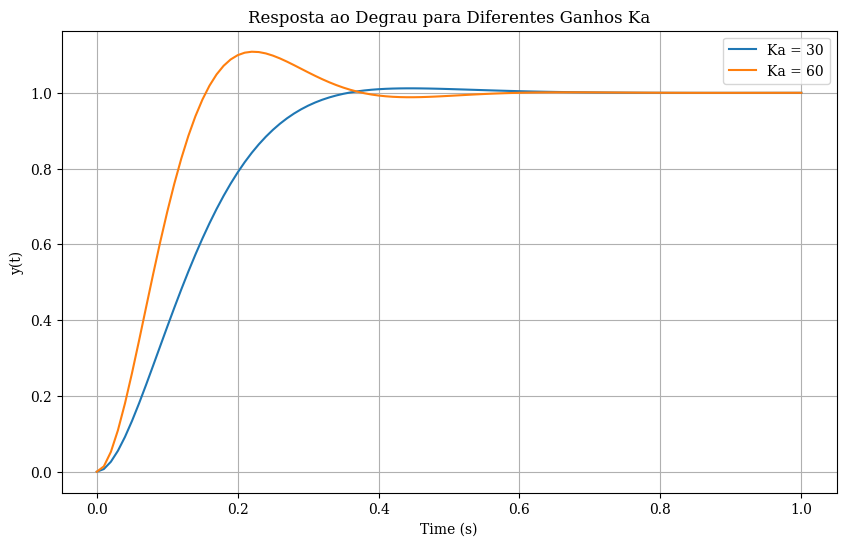

In [49]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 1.01, 0.01)

def simulate_system(Ka):
    sysc = ct.TransferFunction([5*Ka], [1])
    sysg = ct.TransferFunction([1], [1, 20, 0])
    sys_series = ct.series(sysc, sysg)
    return ct.feedback(sys_series, 1)

Ka_values = [30, 60]
systems = [simulate_system(Ka) for Ka in Ka_values]

plt.figure(figsize=(10, 6))

for Ka, sys in zip(Ka_values, systems):
    t, y = ct.step_response(sys, T=t)
    plt.plot(t, y, label=f'Ka = {Ka}')

plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau para Diferentes Ganhos Ka')
plt.legend()
plt.show()